##Dimensionality Reduction

**Problem**: A dataset with 50 or more features -> more than 1 million observations. And, we need to fit a regression model with this dataset.

**Solution**: Dimensionality Reduction with Feature Selection and Extraction.

**Feature Importance:**
 refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

**Feature Selection:**
 is the process where you automatically or manually select features which contribute most to your target variable.

 In short, Feature Importance Scores are used for performing Feature Selection.

####Feature Extraction:

- Feature Extraction is a feature reduction process. Unlike feature selection, which ranks the existing attributes according to their significance, feature extraction actually transforms the features.

- The key difference between feature selection and extraction is that feature selection keeps a subset of the original features while feature extraction creates brand new ones.

- Feature extraction is the name for methods that select and/or combine variables into features, effectively reducing the amount of data that must be processed, while still accurately and completely describing the original dataset.


**Feature selection** — *Selecting the most relevant attributes.*

**Feature extraction** — *Combining attributes into a new, reduced set of features.*

#### The Curse of Dimensionality:

"Why to use the feature selection and extraction methods , while we can optimize our model by tuning parameters?"

That's because of **the curse of dimensionality**.

In ML, *dimensionality = number of features (inputs)*

When the number of features is very large relative to the number of observations (rows) in your dataset, certain algorithms struggle to train eﬀective models. This is called **the Curse of Dimensionality**.

As the number of features increases, the model becomes more complex. The more the number of features, the more the chances of overfitting. A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on and in turn overfitted, resulting in poor performance on real data, defeating the purpose of the model.

To tackle this issue, **Dimensionality Reduction** comes in a play.

#### Benefits of Dimensionality Reduction:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise(irrelevant data).
- Improves Model Performance: Less misleading data means our model’s performance improves.
- Reduces Training Time: Less data means that algorithms train faster.
- Utilize Unlabelled Data: Most feature extraction techniques are unsupervised. You can train your autoencoder or fit your PCA on unlabeled data. This can be helpful if you have a lot of unlabeled data and labeling is time-consuming and expensive.
- Better Visualization: Reducing the dimensions of data to 2D or 3D may allow us to plot and visualize it precisely. You can then observe patterns more clearly.

#### Principle Component Analysis (PCA):
Principal Component Analysis(PCA) is one of the most popular linear dimension reduction techniques. Sometimes, it is used alone and sometimes as a starting solution for other dimension reduction methods.

PCA is a projection based method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

Some real-world applications of PCA are image processing, movie recommendation system, optimizing the power allocation in various communication channels.

Resources:

1.   [Step by Step PCA](https://youtu.be/FgakZw6K1QQ)
           
2.   [High Dimensional Space](https://youtu.be/wvsE8jm1GzE)



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
grains = np.array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884],
       [3.242, 5.714],
       [3.201, 5.438],
       [3.199, 5.439],
       [3.156, 5.479],
       [3.114, 5.482],
       [3.333, 5.351],
       [3.383, 5.119],
       [3.514, 5.527],
       [3.466, 5.205],
       [3.049, 5.226],
       [3.129, 5.658],
       [3.168, 5.52 ],
       [3.507, 5.618],
       [2.936, 5.099],
       [3.245, 5.789],
       [3.421, 5.833],
       [3.026, 5.395],
       [2.956, 5.395],
       [3.221, 5.541],
       [3.065, 5.516],
       [2.975, 5.454],
       [3.371, 5.757],
       [3.186, 5.717],
       [3.15 , 5.585],
       [3.328, 5.712],
       [3.485, 5.709],
       [3.464, 5.826],
       [3.683, 5.832],
       [3.288, 5.656],
       [3.298, 5.397],
       [3.156, 5.348],
       [3.158, 5.351],
       [3.201, 5.138],
       [3.396, 5.877],
       [3.462, 5.579],
       [3.155, 5.376],
       [3.393, 5.701],
       [3.377, 5.57 ],
       [3.291, 5.545],
       [3.258, 5.678],
       [3.272, 5.585],
       [3.434, 5.674],
       [3.113, 5.715],
       [3.199, 5.504],
       [3.113, 5.741],
       [3.212, 5.702],
       [3.377, 5.388],
       [3.412, 5.384],
       [3.419, 5.662],
       [3.032, 5.159],
       [2.85 , 5.008],
       [2.879, 4.902],
       [3.042, 5.076],
       [3.07 , 5.395],
       [3.026, 5.262],
       [3.119, 5.139],
       [3.19 , 5.63 ],
       [3.158, 5.609],
       [3.153, 5.569],
       [2.882, 5.412],
       [3.561, 6.191],
       [3.484, 5.998],
       [3.594, 5.978],
       [3.93 , 6.154],
       [3.486, 6.017],
       [3.438, 5.927],
       [3.403, 6.064],
       [3.814, 6.579],
       [3.639, 6.445],
       [3.566, 5.85 ],
       [3.467, 5.875],
       [3.857, 6.006],
       [3.864, 6.285],
       [3.772, 6.384],
       [3.801, 6.366],
       [3.651, 6.173],
       [3.764, 6.084],
       [3.67 , 6.549],
       [4.033, 6.573],
       [4.032, 6.45 ],
       [3.785, 6.581],
       [3.796, 6.172],
       [3.693, 6.272],
       [3.86 , 6.037],
       [3.485, 6.666],
       [3.463, 6.139],
       [3.81 , 6.341],
       [3.552, 6.449],
       [3.512, 6.271],
       [3.684, 6.219],
       [3.525, 5.718],
       [3.694, 5.89 ],
       [3.892, 6.113],
       [3.681, 6.369],
       [3.755, 6.248],
       [3.786, 6.037],
       [3.806, 6.152],
       [3.573, 6.033],
       [3.763, 6.675],
       [3.674, 6.153],
       [3.769, 6.107],
       [3.791, 6.303],
       [3.902, 6.183],
       [3.737, 6.259],
       [3.991, 6.563],
       [3.719, 6.416],
       [3.897, 6.051],
       [3.815, 6.245],
       [3.769, 6.227],
       [3.857, 6.493],
       [3.962, 6.315],
       [3.563, 6.059],
       [3.387, 5.762],
       [3.771, 5.98 ],
       [3.582, 5.363],
       [3.869, 6.111],
       [3.594, 6.285],
       [3.687, 5.979],
       [3.773, 6.513],
       [3.69 , 5.791],
       [3.755, 5.979],
       [3.825, 6.144],
       [3.268, 5.884],
       [3.395, 5.845],
       [3.408, 5.776],
       [3.465, 5.477],
       [3.574, 6.145],
       [3.231, 5.92 ],
       [3.286, 5.832],
       [3.472, 5.872],
       [2.994, 5.472],
       [3.073, 5.541],
       [3.074, 5.389],
       [2.967, 5.224],
       [2.777, 5.314],
       [2.687, 5.279],
       [2.719, 5.176],
       [2.967, 5.267],
       [2.911, 5.386],
       [2.648, 5.317],
       [2.84 , 5.263],
       [2.776, 5.405],
       [2.833, 5.408],
       [2.693, 5.22 ],
       [2.755, 5.175],
       [2.675, 5.25 ],
       [2.849, 5.053],
       [2.745, 5.394],
       [2.678, 5.444],
       [2.695, 5.304],
       [2.879, 5.451],
       [2.81 , 5.35 ],
       [2.847, 5.267],
       [2.968, 5.333],
       [2.794, 5.011],
       [2.941, 5.105],
       [2.897, 5.319],
       [2.837, 5.417],
       [2.668, 5.176],
       [2.715, 5.09 ],
       [2.701, 5.325],
       [2.845, 5.167],
       [2.763, 5.088],
       [2.763, 5.136],
       [2.641, 5.278],
       [2.821, 4.981],
       [2.71 , 5.186],
       [2.642, 5.145],
       [2.758, 5.18 ],
       [2.893, 5.357],
       [2.775, 5.09 ],
       [3.017, 5.236],
       [2.909, 5.24 ],
       [2.85 , 5.108],
       [3.026, 5.495],
       [2.683, 5.363],
       [2.716, 5.413],
       [2.675, 5.088],
       [2.821, 5.089],
       [2.787, 4.899],
       [2.717, 5.046],
       [2.804, 5.091],
       [2.953, 5.132],
       [2.63 , 5.18 ],
       [2.975, 5.236],
       [3.126, 5.16 ],
       [3.054, 5.224],
       [3.128, 5.32 ],
       [2.911, 5.41 ],
       [3.155, 5.073],
       [2.989, 5.219],
       [3.135, 4.984],
       [2.81 , 5.009],
       [3.091, 5.183],
       [2.96 , 5.204],
       [2.981, 5.137],
       [2.795, 5.14 ],
       [3.232, 5.236],
       [2.836, 5.175],
       [2.974, 5.243]])


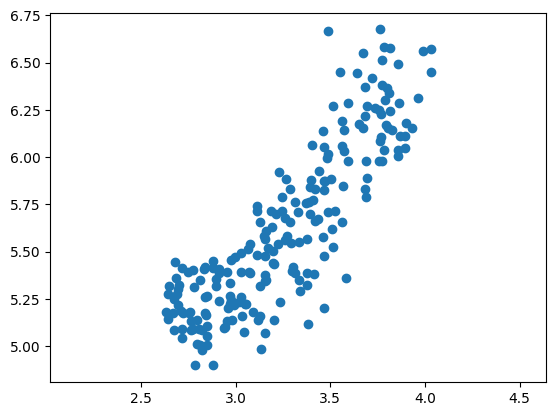

0.8604149377143469


In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


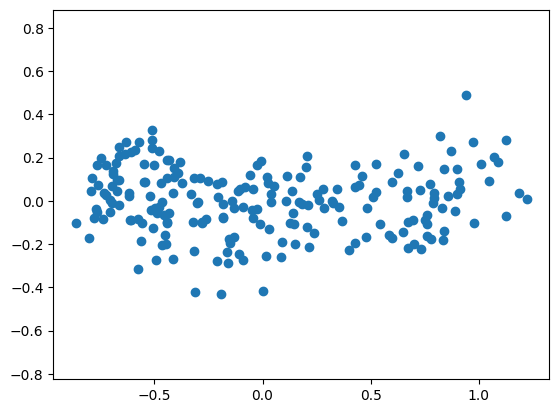

7.676151381197371e-17


In [ ]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

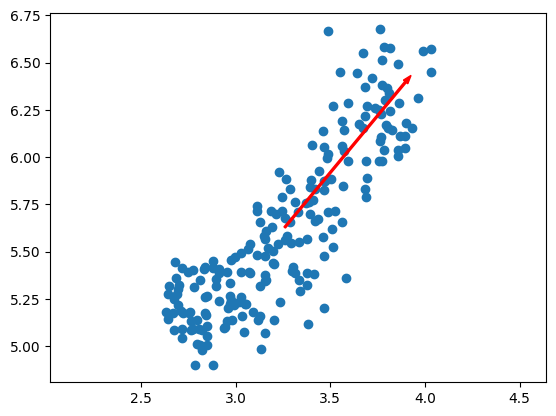

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

The first principal component of the data is the direction in which the data varies the most

In [ ]:
samples = np.array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]]
)

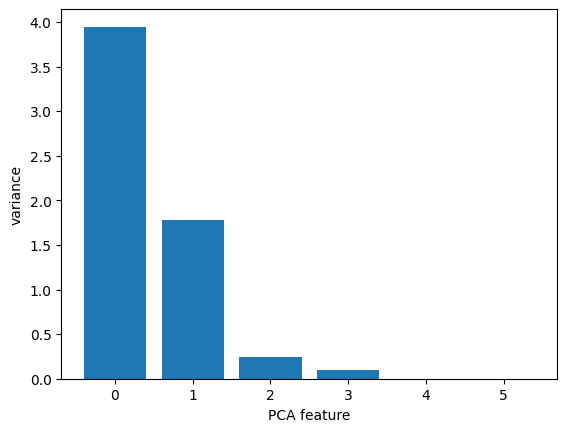

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

From above graph, we can choose the number of components as 2, as others are not informative features.

In [ ]:
#Steps of PCA Implementation

from sklearn.decomposition import PCA

#Intialize PCA and number of components
pca = PCA(n_components= 2)

#fit the model to data

pca.fit(samples)

#transform the model to data
transformed = pca.transform(samples)

print(samples.shape)
print(transformed.shape)

(85, 6)
(85, 2)


In [ ]:
#get list of components
pca.components_

array([[ 9.98693344e-01,  2.65768833e-02,  2.88923473e-02,
         3.17589686e-02,  7.85463205e-03,  4.22429035e-04],
       [-2.11858155e-02,  3.43921476e-01,  3.43687517e-01,
         2.70326509e-01, -8.20096213e-01, -1.32339906e-01]])

In [ ]:
#get list of eigen values
pca.explained_variance_ratio_

array([9.98750942e-01, 8.26697620e-04])

PCA on Digits Datasets:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
# Load Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

In [ ]:
X.shape

(1797, 64)

In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y,
random_state=0)

In [ ]:
pca = make_pipeline(StandardScaler(),PCA(n_components=2,random_state=0))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3) # Number of neighbors to use

In [ ]:
# Fit the method's model
pca.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(pca.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(pca.transform(X_test), y_test)

# Fit the methons using the fitted model
X_embedded = pca.transform(X)


In [ ]:
X_embedded.shape

(1797, 2)

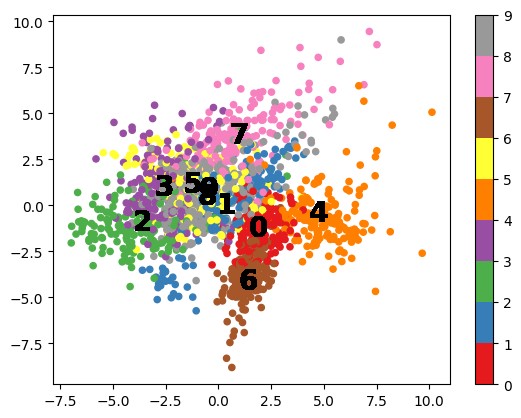

In [ ]:
# Creating a dataframe to easily plot the sample label
df = pd.DataFrame(np.concatenate((X_embedded, np.reshape(y, (-1, 1))), axis=1))

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=20, cmap='Set1')
plt.colorbar()

for i, number in enumerate(y_test):
  plt.annotate(number,df.loc[df[2]==number,[0,1]].mean(),
               horizontalalignment='center',verticalalignment='center',
               weight='bold',size='20')
plt.show()